## Decision tree

In [7]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
from sklearn.naive_bayes import GaussianNB
import pickle


In [9]:
from sklearn.tree import DecisionTreeClassifier

### Credit risk data

In [8]:
with open('risk_credit.pkl', 'rb') as f:
    x_risk_data, y_risk_data = pickle.load(f)

In [10]:
x_risk_data, y_risk_data
#historia	divida	garantias	renda	output: risco

(array([[2, 0, 1, 0],
        [1, 0, 1, 1],
        [1, 1, 1, 1],
        [1, 1, 1, 2],
        [1, 1, 1, 2],
        [1, 1, 0, 2],
        [2, 1, 1, 0],
        [2, 1, 0, 2],
        [0, 1, 1, 2],
        [0, 0, 0, 2],
        [0, 0, 1, 0],
        [0, 0, 1, 1],
        [0, 0, 1, 2],
        [2, 0, 1, 1]], dtype=object),
 array(['alto', 'alto', 'moderado', 'alto', 'baixo', 'baixo', 'alto',
        'moderado', 'baixo', 'baixo', 'alto', 'moderado', 'baixo', 'alto'],
       dtype=object))

In [11]:
decision_tree = DecisionTreeClassifier( criterion = "entropy")
decision_tree.fit(x_risk_data,y_risk_data)

DecisionTreeClassifier(criterion='entropy')

In [13]:
decision_tree.feature_importances_

array([0.41607015, 0.10294068, 0.03885431, 0.44213486])

[Text(0.5555555555555556, 0.9166666666666666, 'income <= 1.5\nentropy = 1.531\nsamples = 14\nvalue = [6, 5, 3]\nclass = alto'),
 Text(0.3333333333333333, 0.75, 'history <= 1.5\nentropy = 0.863\nsamples = 7\nvalue = [5, 0, 2]\nclass = alto'),
 Text(0.4444444444444444, 0.8333333333333333, 'True  '),
 Text(0.2222222222222222, 0.5833333333333334, 'income <= 0.5\nentropy = 1.0\nsamples = 4\nvalue = [2, 0, 2]\nclass = alto'),
 Text(0.1111111111111111, 0.4166666666666667, 'entropy = 0.0\nsamples = 1\nvalue = [1, 0, 0]\nclass = alto'),
 Text(0.3333333333333333, 0.4166666666666667, 'history <= 0.5\nentropy = 0.918\nsamples = 3\nvalue = [1, 0, 2]\nclass = moderado'),
 Text(0.2222222222222222, 0.25, 'entropy = 0.0\nsamples = 1\nvalue = [0, 0, 1]\nclass = moderado'),
 Text(0.4444444444444444, 0.25, 'debt <= 0.5\nentropy = 1.0\nsamples = 2\nvalue = [1, 0, 1]\nclass = alto'),
 Text(0.3333333333333333, 0.08333333333333333, 'entropy = 0.0\nsamples = 1\nvalue = [1, 0, 0]\nclass = alto'),
 Text(0.555555

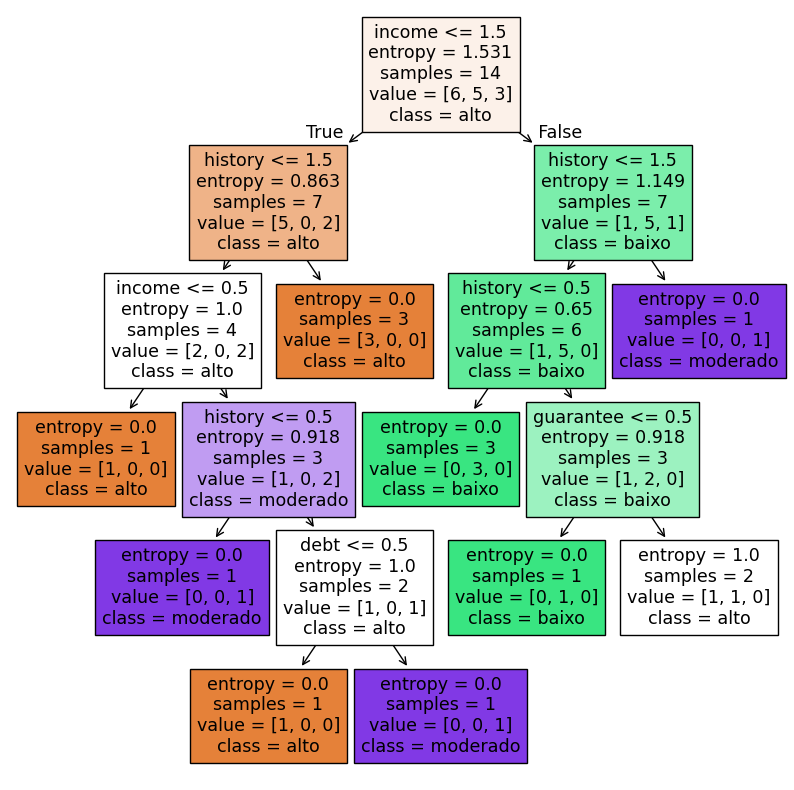

In [21]:
from sklearn import tree
atributes = ['history', 'debt', 'guarantee','income']
figure, axes = plt.subplots(nrows = 1, ncols = 1, figsize = (10,10))
tree.plot_tree(decision_tree, feature_names = atributes, 
               class_names= decision_tree.classes_, filled=True)

In [22]:
#case1: history: good, debt: high, guarantee: none, income: >35
#                0            0                 1           2

#case2: history: bad, debt: high, guarantee: adequate, income: <15
#                2            0                 0           0

prediction = decision_tree.predict([[0,0,1,2],[2,0,0,0]])
prediction

array(['baixo', 'alto'], dtype=object)

### Credit data

In [23]:
with open('credit.pkl', 'rb') as f:
    x_credit_training, y_credit_training, x_credit_test, y_credit_test = pickle.load(f)

In [24]:
x_credit_training.shape, y_credit_training.shape, x_credit_test.shape, y_credit_test.shape

((1500, 3), (1500,), (500, 3), (500,))

In [27]:
decision_tree = DecisionTreeClassifier( criterion = "entropy", random_state=0)
decision_tree.fit(x_credit_training,y_credit_training)

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [28]:
decision_tree.feature_importances_

array([0.21219711, 0.39503611, 0.39276678])

In [30]:
prediction = decision_tree.predict(x_credit_test)
prediction

array([1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [31]:
from sklearn.metrics import accuracy_score, classification_report
accuracy_score(y_credit_test,prediction)

0.982

0.982

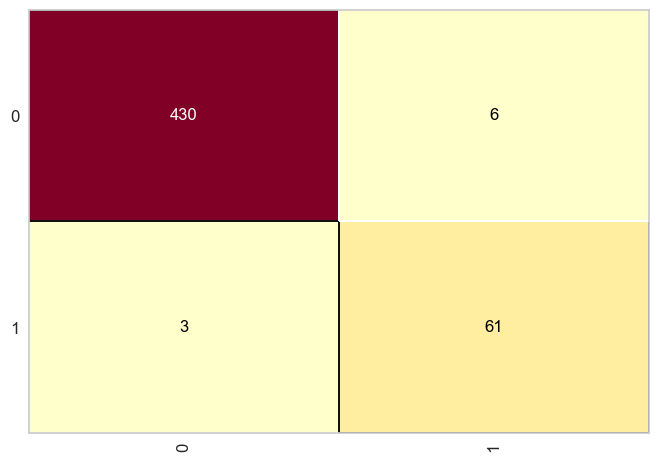

In [32]:
from yellowbrick.classifier import ConfusionMatrix
confusion_matrix = ConfusionMatrix(decision_tree)
confusion_matrix.fit(x_credit_training,y_credit_training)
confusion_matrix.score(x_credit_test,y_credit_test)

In [33]:
print(classification_report(y_credit_test,prediction))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       436
           1       0.91      0.95      0.93        64

    accuracy                           0.98       500
   macro avg       0.95      0.97      0.96       500
weighted avg       0.98      0.98      0.98       500



In [38]:
str(decision_tree.classes_)

'[0 1]'

[Text(0.47619047619047616, 0.9444444444444444, 'age <= -0.453\nentropy = 0.6\nsamples = 1500\nvalue = [1281, 219]\nclass = 0'),
 Text(0.42857142857142855, 0.8333333333333334, 'loan <= -0.253\nentropy = 0.963\nsamples = 565\nvalue = [346, 219]\nclass = 0'),
 Text(0.45238095238095233, 0.8888888888888888, 'True  '),
 Text(0.14285714285714285, 0.7222222222222222, 'income <= -1.241\nentropy = 0.284\nsamples = 263\nvalue = [250, 13]\nclass = 0'),
 Text(0.09523809523809523, 0.6111111111111112, 'loan <= -0.644\nentropy = 0.722\nsamples = 65\nvalue = [52, 13]\nclass = 0'),
 Text(0.047619047619047616, 0.5, 'entropy = 0.0\nsamples = 46\nvalue = [46, 0]\nclass = 0'),
 Text(0.14285714285714285, 0.5, 'income <= -1.64\nentropy = 0.9\nsamples = 19\nvalue = [6, 13]\nclass = 1'),
 Text(0.09523809523809523, 0.3888888888888889, 'entropy = 0.0\nsamples = 8\nvalue = [0, 8]\nclass = 1'),
 Text(0.19047619047619047, 0.3888888888888889, 'loan <= -0.487\nentropy = 0.994\nsamples = 11\nvalue = [6, 5]\nclass = 0')

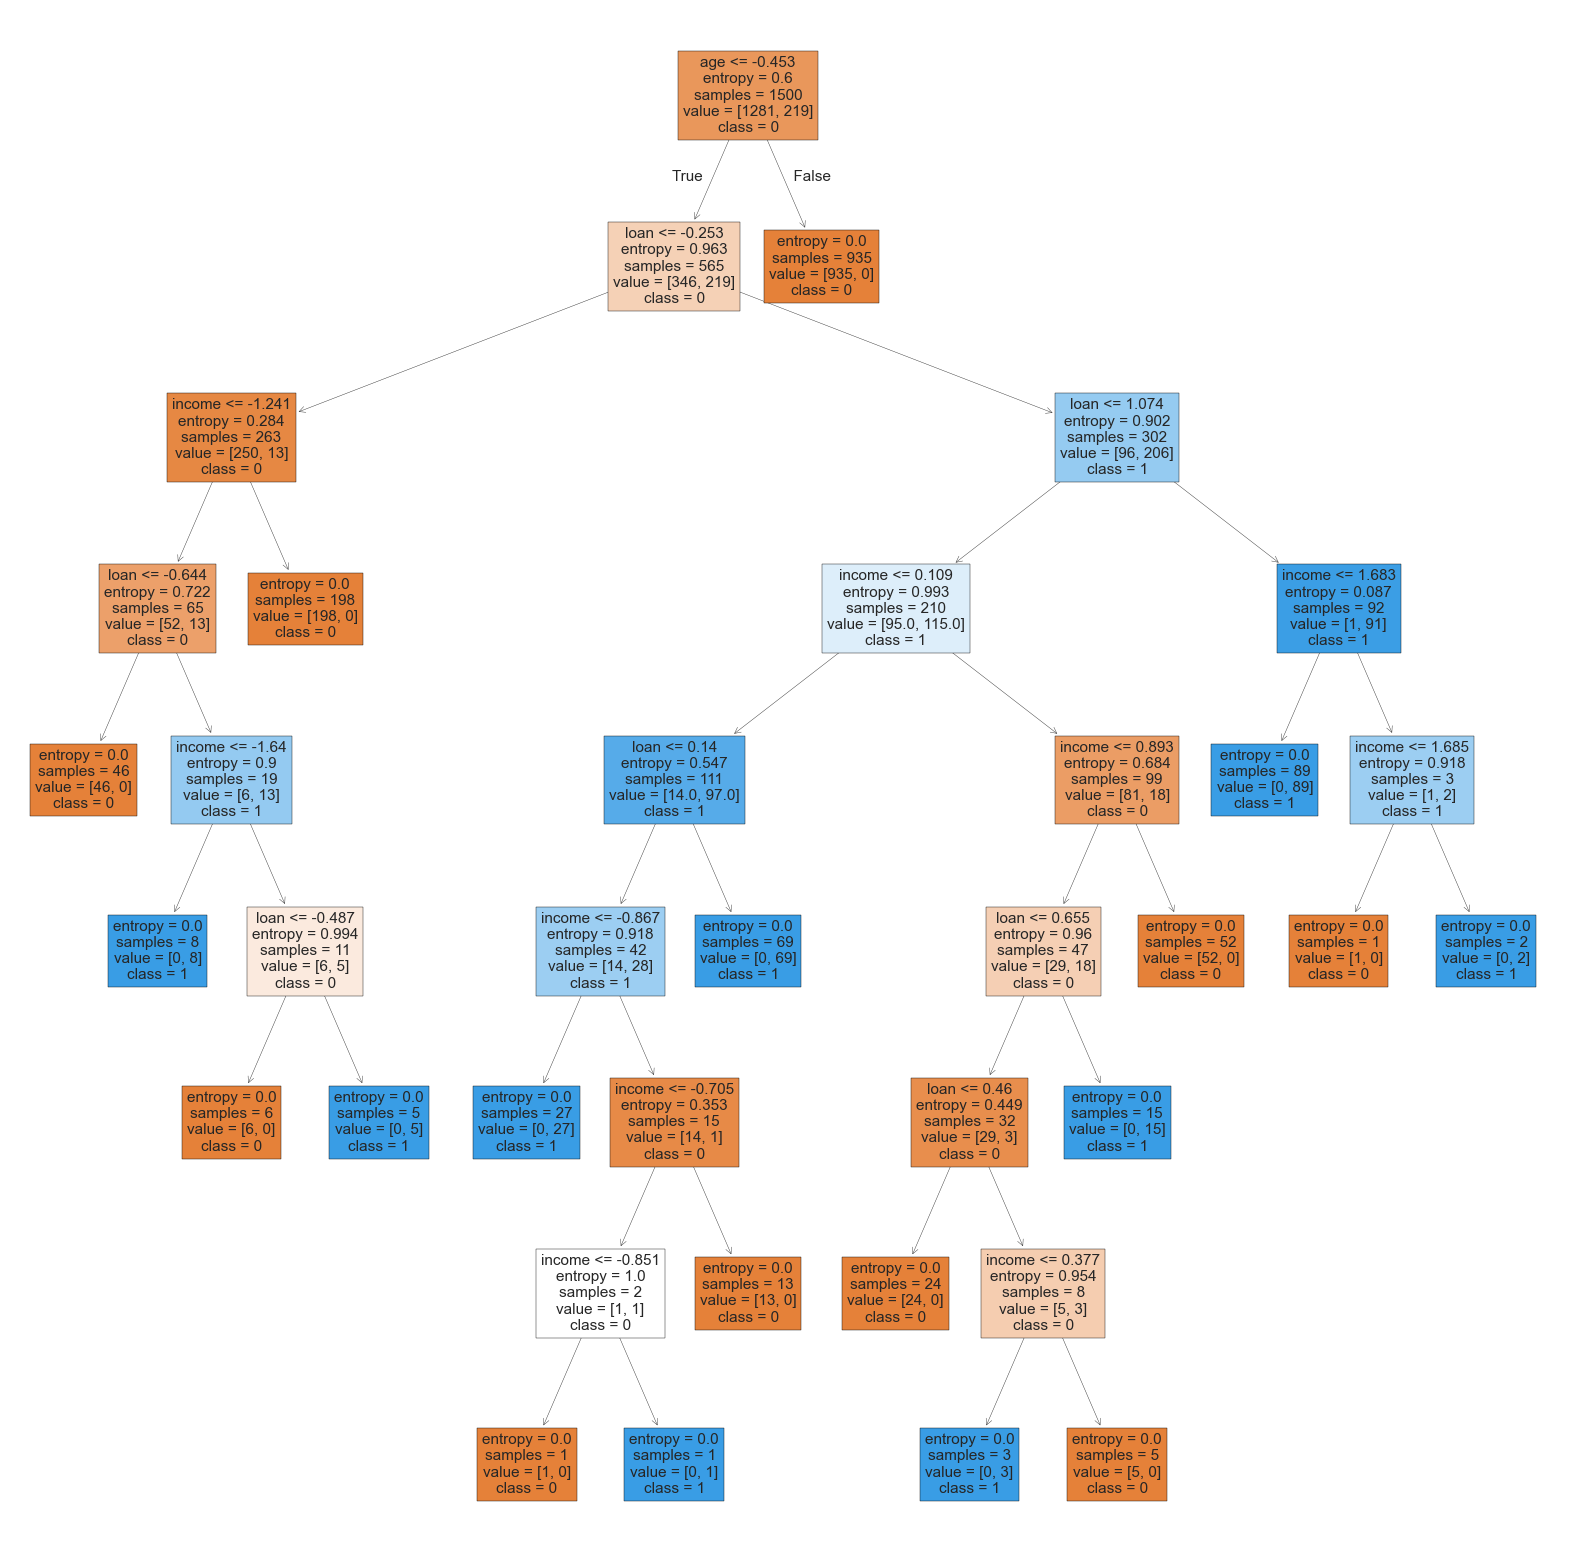

In [42]:
from sklearn import tree
atributes = ['income', 'age', 'loan']
figure, axes = plt.subplots(nrows = 1, ncols = 1, figsize = (20,20))
tree.plot_tree(decision_tree, feature_names = atributes, 
               class_names= ['0','1'], 
               filled=True)